In [36]:
import bs4 as bs # import beautifulsoup
import urllib.request # to open link
import pandas as pd
import numpy as np
import os
from PIL import Image
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [271]:
curr_dir = os.getcwd()
tar_dir = curr_dir + '/data/clean'
#os.listdir(tar_dir)

In [264]:
#file_19VzlaEnLaCalle = os.listdir(tar_dir)[0]
#file_19F = os.listdir(tar_dir)[1]
#file_23Feb = os.listdir(tar_dir)[3]
#file_MillonesContraLaDictadura = os.listdir(tar_dir)[5]
#file_12F = os.listdir(tar_dir)[6]
#file_24Mayo = os.listdir(tar_dir)[8]
#file_ElLlanito = os.listdir(tar_dir)[1]
#file_21Ene = os.listdir(tar_dir)[10]
file_YoReportoEl26O = os.listdir(tar_dir)[13]


path = tar_dir + '/' + file_YoReportoEl26O

In [266]:
df = pd.read_csv(path, sep=';',error_bad_lines=False)
df.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,contrapuntovzla,2016-10-28 09:35,88,16,# YoReportoEl26O En otra cuadra del bulevar de...,NaN,NaN,#,7.919969e+17,https://twitter.com/contrapuntovzla/status/791...
1,contrapuntovzla,2016-10-27 19:35,2,1,# YoReportoEl26O Desde el inicio de la marcha ...,NaN,NaN,#,7.917854e+17,https://twitter.com/contrapuntovzla/status/791...
2,contrapuntovzla,2016-10-27 14:42,1,0,"# YoReportoEl26O “No tienes bolas. Bájate”, “N...",NaN,NaN,#,7.917116e+17,https://twitter.com/contrapuntovzla/status/791...
3,contrapuntovzla,2016-10-27 14:00,2,1,# YoReportoEl26O Capriles: Esto se trata no so...,NaN,NaN,#,7.917010e+17,https://twitter.com/contrapuntovzla/status/791...
4,contrapuntovzla,2016-10-27 13:42,2,0,# YoReportoEl26O Seguidores de la oposición gr...,NaN,NaN,#,7.916965e+17,https://twitter.com/contrapuntovzla/status/791...


In [267]:
tweets = " ".join(tweet for tweet in df.text)

### Clean data

Change accented text to plain text

In [201]:
def remove_accents(tweets):
    no_accents = re.sub(r'é', 'e', tweets)
    no_accents = re.sub(r'á', 'a', no_accents)
    no_accents = re.sub(r'ó', 'o', no_accents)
    no_accents = re.sub(r'í', 'i', no_accents)
    no_accents = re.sub(r'ñ', 'n', no_accents)
    no_accents = re.sub(r'ú', 'u', no_accents)
    return no_accents

Remove symbols, links, unicode, pictwitter


In [195]:
def clean_data(no_accents):
    no_hashtags = re.sub("# [^ ]+", '', no_accents)
    no_links = re.sub(r'http\S+', '', no_hashtags)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    no_pic = re.sub("pictwitter\w*", '', no_special_characters)
    return no_pic

In [268]:
no_pic = clean_data(remove_accents(tweets))
tweets_clean = no_pic
tweets_clean = tweets_clean.lower()

### Stop words <br>
Because the text is in Spanish, I utilized a Spanish set of stop words that was found in the Python package stop-words.

In [261]:
from stop_words import get_stop_words

stopwords = set(STOPWORDS)
spanish_words = get_stop_words('spanish')
spanish_words.append('retweeted')
stopwords.update(spanish_words)

### Plot wordcloud

Without Hashtags

In [269]:
wordcloud = WordCloud(stopwords=stopwords, min_font_size = 8, max_font_size=100, 
                      max_words=200,colormap="Reds", contour_width = 1, 
                      contour_color = "Red",collocations = False,
                      background_color="white").generate(tweets_clean)

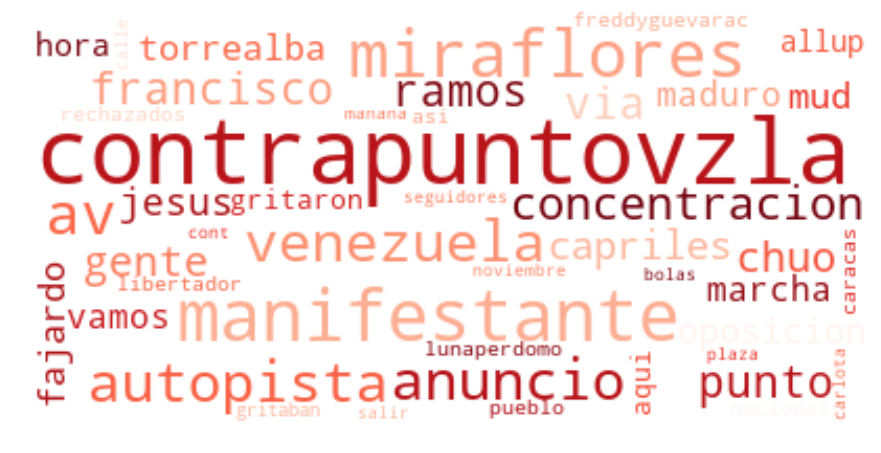

In [270]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("file_YoReportoEl26O")